# Exercise (Normal Distribution and Z Score for Outlier Removal)
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
After removing outliers in step 1, you get a new dataframe.
On step(2) dataframe, use 4 standard deviation to remove outliers
Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result
Solution

In [1]:
import pandas as pd

In [14]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [15]:
df = pd.read_csv('bhp.csv')


In [5]:
df?

In [16]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [17]:
df.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [18]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [19]:
df.price_per_sqft

0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13200, dtype: int64

In [20]:
df.price_per_sqft.head(20)

0      3699
1      4615
2      4305
3      6245
4      4250
5      3247
6      7467
7     18181
8      4828
9     36274
10     3888
11    10592
12     3800
13     3636
14     6577
15     6255
16     4067
17     3896
18    10469
19     4363
Name: price_per_sqft, dtype: int64

In [23]:
# sns.histplot(df.price_per_sqft, kde = True, linewidth = 5)

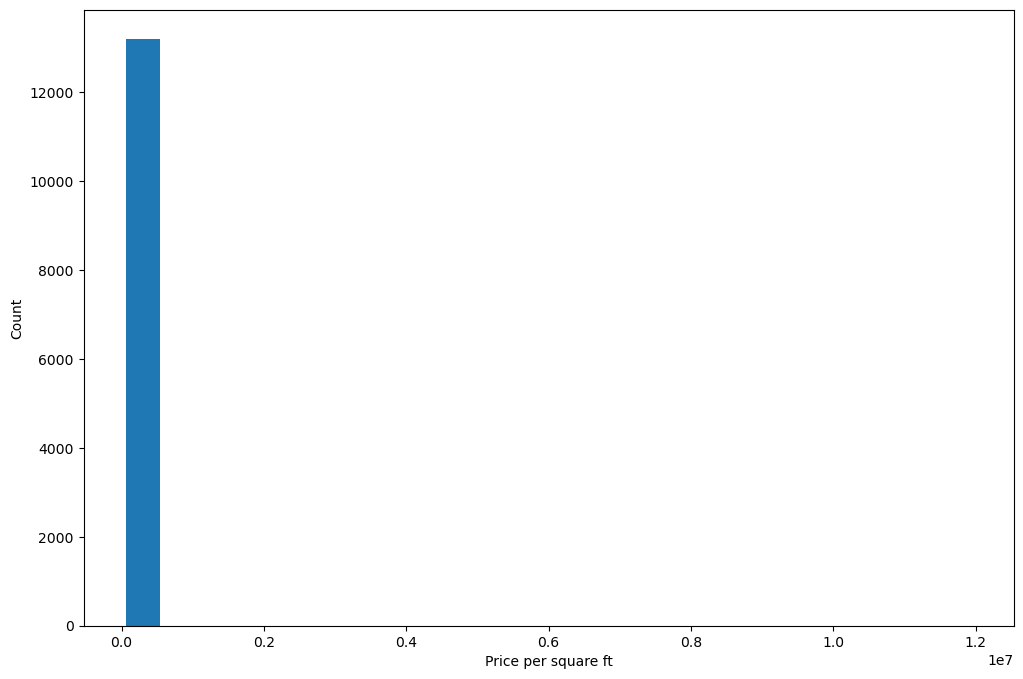

In [26]:
plt.hist(df.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

 Using log scale can make visualization little better



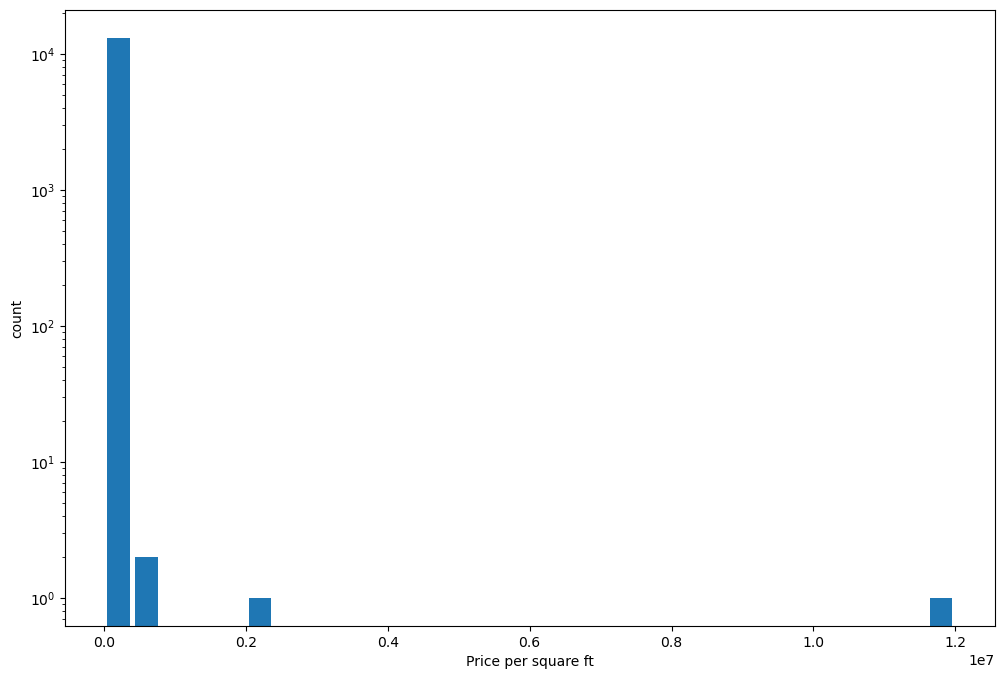

In [27]:
plt.hist(df.price_per_sqft, bins = 30, rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

(1) Treat outliers using percentile first


In [28]:
min_limit, max_limit = df.price_per_sqft.quantile([0.001, 0.999])

In [29]:
min_limit, max_limit

(1366.184, 50959.36200000098)

In [30]:
outliers = df[ ( df.price_per_sqft > max_limit) | ( df.price_per_sqft < min_limit) ]

In [31]:
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
12355,other,4 BHK,16335.0,4.0,149.0,4,912
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1005,other,1 BHK,15.0,1.0,30.0,1,200000


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [34]:
no_outliers = df[ (df.price_per_sqft < max_limit) & (df.price_per_sqft > min_limit) ]

In [35]:
no_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [36]:
outliers.shape

(28, 7)

In [37]:
no_outliers.shape

(13172, 7)

In [38]:
df.shape

(13200, 7)

In [40]:
df.shape[0] - no_outliers.shape[0]

28

We removed total 28 outliers



Now remove outliers using 4 standard deviation


In [42]:
maxx_lim = no_outliers.price_per_sqft.mean() + 4 * no_outliers.price_per_sqft.std()

In [43]:
minn_lim = no_outliers.price_per_sqft.mean() - 4 * no_outliers.price_per_sqft.std()

In [44]:
minn_lim

-9900.429065502549

In [45]:
maxx_lim

23227.73653589429

In [47]:
no_outliers[ (no_outliers.price_per_sqft > maxx_lim) | (no_outliers.price_per_sqft < minn_lim) ].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10327,Cunningham Road,4 Bedroom,7500.00,6.0,1800.0,4,24000
11696,other,4 Bedroom,2360.00,4.0,601.0,4,25466
12678,Chikkalasandra,5 Bedroom,1000.00,4.0,300.0,5,30000
5639,other,3 BHK,2777.29,5.0,650.0,3,23404
4400,other,8 Bedroom,750.00,8.0,200.0,8,26666
13078,other,4 Bedroom,9200.00,4.0,2600.0,4,28260
1721,other,5 Bedroom,2400.00,5.0,625.0,5,26041
12671,other,4 Bedroom,1200.00,5.0,325.0,4,27083
11650,other,5 Bedroom,9600.00,7.0,2736.0,5,28500
3488,Banashankari Stage III,8 Bedroom,1200.00,7.0,350.0,8,29166


In [50]:
df3 = no_outliers[(no_outliers.price_per_sqft < maxx_lim) & (no_outliers.price_per_sqft > minn_lim) ]

In [51]:
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


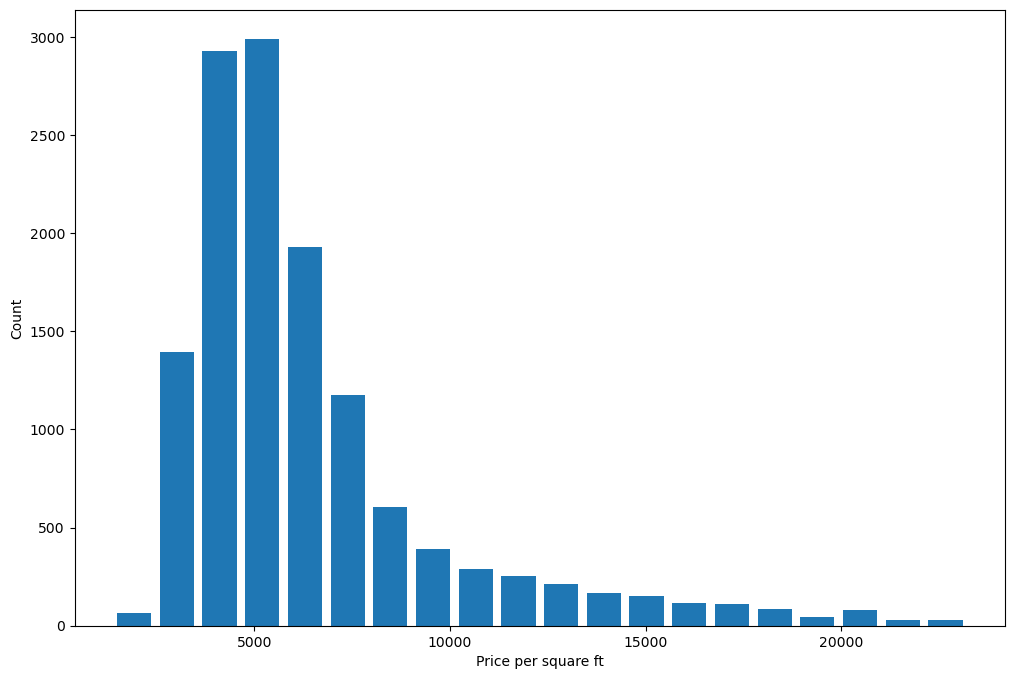

In [55]:
no_outliers.shape[0] - df3.shape[0]

125

# In this step, we have removed total 125 outliers

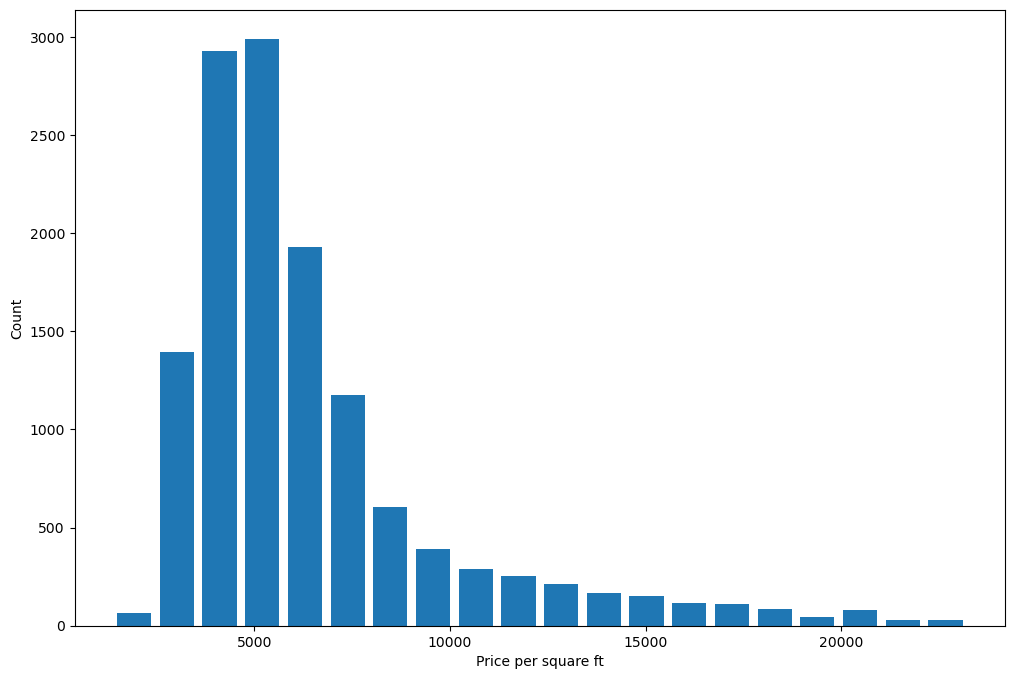

In [57]:
plt.hist(df3.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

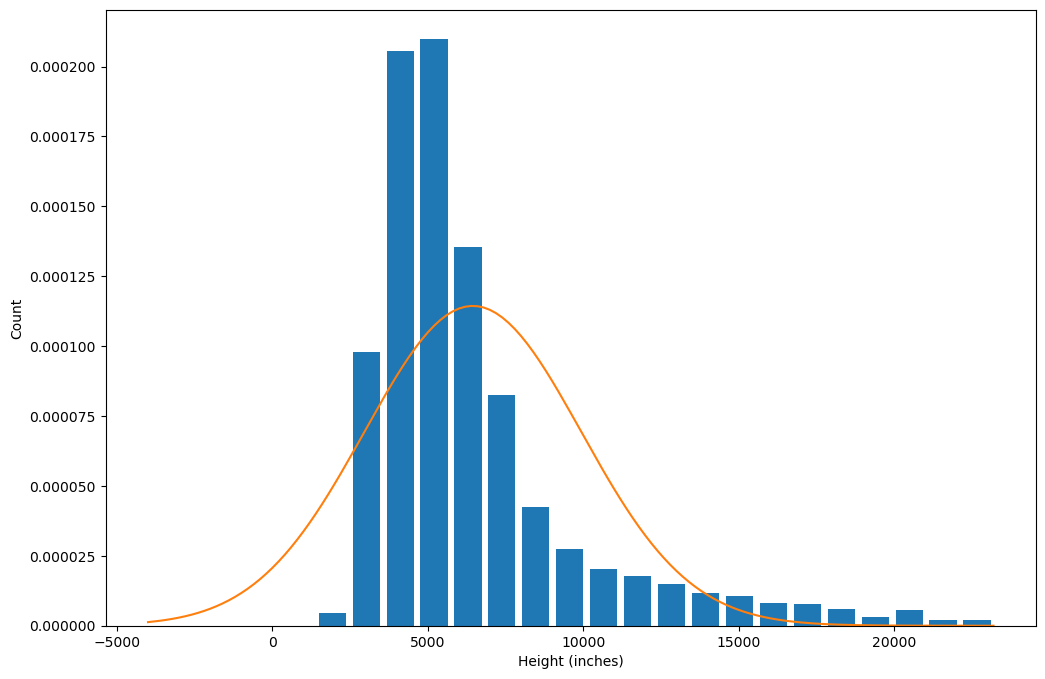

In [58]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins = 20, rwidth = 0.8, density = True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-4000, df3.price_per_sqft.max(), 200)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

(3) Now remove outliers using z score. Use z score of 4 as your thresold

In [60]:
no_outliers['zscore'] = (no_outliers.price_per_sqft - no_outliers.price_per_sqft.mean()) / no_outliers.price_per_sqft.std()

C:\Users\MONISHA JAIN\AppData\Local\Temp\ipykernel_17520\2124222931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers['zscore'] = (no_outliers.price_per_sqft - no_outliers.price_per_sqft.mean()) / no_outliers.price_per_sqft.std()


In [61]:
no_outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3777,other,2 Bedroom,2400.0,2.0,160.00,2,6666,0.000567
784,Kathriguppe,3 BHK,1400.0,2.0,77.00,3,5500,-0.281007
6067,other,2 BHK,1020.0,2.0,48.00,2,4705,-0.472988
6796,other,8 Bedroom,1200.0,8.0,135.00,8,11250,1.107540
9318,Hormavu,3 BHK,1385.0,2.0,69.25,3,5000,-0.401750
2227,Bommasandra,2 BHK,877.0,2.0,30.00,2,3420,-0.783298
10976,Banashankari,3 BHK,1200.0,2.0,42.00,3,3500,-0.763979
10514,Malleshwaram,2 BHK,1020.0,2.0,80.00,2,7843,0.284796
5297,Bellandur,2 BHK,1550.0,2.0,59.00,2,3806,-0.690084
5593,other,3 BHK,2000.0,3.0,145.00,3,7250,0.141595


In [63]:
outliers_z = no_outliers[ (no_outliers.zscore < -4) | (no_outliers.zscore > +4)]

In [64]:
outliers_z

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [65]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3340,other,19 BHK,2000.0,16.0,490.0,19,24500,4.307234
9711,Rajaji Nagar,2 Bedroom,1056.0,1.0,250.0,2,23674,4.107767
12095,other,7 Bedroom,2240.0,4.0,700.0,7,31250,5.937267
4609,other,4 Bedroom,1800.0,5.0,500.0,4,27777,5.098585
12393,Electronic City Phase II,1 BHK,1200.0,1.0,295.0,1,24583,4.327278


In [67]:
df4 = no_outliers[ (no_outliers.zscore > -4) & (no_outliers.zscore < +4) ]

In [68]:
df4.shape

(13047, 8)

In [69]:
no_outliers.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation